<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter02/Building_a_neural_network_using_PyTorch_on_a_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [3]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [4]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cuda' if torch.cuda.is_available() else 'mps'
X = X.to(device)
Y = Y.to(device)

In [5]:
import torch.nn as nn

In [6]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [7]:
mynet = MyNeuralNet().to(device)

In [8]:
loss_func = nn.MSELoss()

In [9]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(93.8611, device='mps:0', grad_fn=<MseLossBackward0>)


In [10]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [11]:
# %%timeit

loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

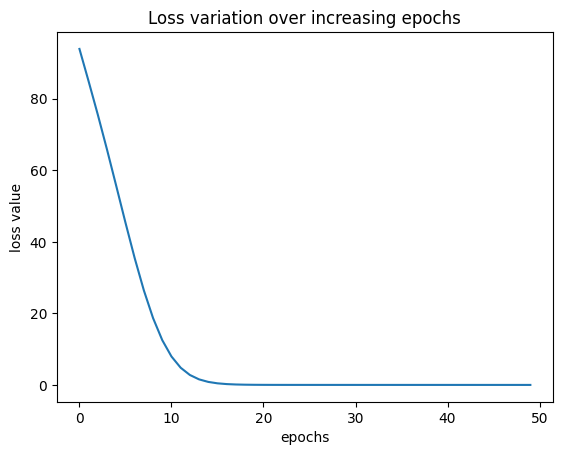

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [13]:
mynet

MyNeuralNet(
  (input_to_hidden_layer): Linear(in_features=2, out_features=8, bias=True)
  (hidden_layer_activation): ReLU()
  (hidden_to_output_layer): Linear(in_features=8, out_features=1, bias=True)
)

In [14]:
%%timeit
import random


x = torch.ones(5000, device='mps')
x * random.randint(0, 100)

30.9 μs ± 907 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [15]:
%%timeit
import random


x = torch.ones(5000, device='cpu')
x * random.randint(0, 100)

3.58 μs ± 252 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


MPS is only faster for large matrix calculations. Better profile a few backprop to decide on which device to use.

In [22]:
from torchsummary import summary

summary(mynet, torch.zeros(1, 2))


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00